# EDA on Initial Sampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('newly_sampled_data.csv')

In [3]:
df.head(1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/mor...,"In President Obama ’s first term, the fiscal s...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and...","To have healthy economic growth, President Oba...",NaN,NaN,nytimes


In [4]:
df = df.rename_axis('document')

In [5]:
df.head(1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/mor...,"In President Obama ’s first term, the fiscal s...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and...","To have healthy economic growth, President Oba...",NaN,NaN,nytimes


In [6]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
document,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/mor...,"In President Obama ’s first term, the fiscal s...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and...","To have healthy economic growth, President Oba..."
1,4194551,dailykos.com,political,https://www.dailykos.com/stories/2017/5/15/166...,Brain trust\n\nPolitico has a story up about h...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Donald Trump still believes fake news because ...,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN
2,454455,beforeitsnews.com,fake,http://beforeitsnews.com/science-and-technolog...,Google HIPAA Compliance under Question in Cong...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Google HIPAA Compliance under Question in Cong...,Coup Media Group-Scitech,NaN,[''],NaN
3,5405677,anonhq.com,unreliable,http://anonhq.com/sesame-street-introduces-jul...,"To reduce the stigma associated with autism, S...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,"Sesame Street Introduces Julia, Its First Mupp...",Please Enter Your Name Here,NaN,[''],NaN
4,5821283,express.co.uk,rumor,https://www.express.co.uk/sport/football/26615...,ARSENAL 0 LIVERPOOL 2 []\n\nSamir Nasri impres...,2017-11-27T01:14:33.570665,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Arsenal 0 Liverpool 2: Emmanuel Frimpong sees red,Gary Jones For Express.Co.Uk,NaN,[''],ARSENAL 0 -- LIVERPOOL 2: LIVERPOOL recorded t...
5,6929803,beforeitsnews.com,fake,http://beforeitsnews.com/alternative/2016/01/a...,Ambassador Leo Emil Wanta Round Five with Kare...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Ambassador Leo Emil Wanta Round Five with Kare...,NaN,NaN,[''],NaN
6,2777976,dailykos.com,political,https://www.dailykos.com/stories/2012/08/24/11...,"Here at Daily Kos Elections, we're going to st...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Daily Kos Elections race ratings changes: 8,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN
7,4219082,wikileaks.org,unreliable,https://wikileaks.org/plusd/cables/1975STATE00...,Tor\n\nTor is an encrypted anonymising network...,2017-11-27T01:15:37.733539,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Cable: 1975STATE006454,NaN,NaN,[''],NaN
8,8919447,nytimes.com,reliable,https://query.nytimes.com/gst/fullpage.html?re...,"DONENFELD--Arlene J. Actress, Administrator, A...",2018-02-11 00:40:18.858765,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"Paid Notice: Deaths DONENFELD, ARLENE J.",NaN,NaN,['DONENFELD ARLENE J.'],"DONENFELD--Arlene J. Actress, Administrator, A..."


Visualizations

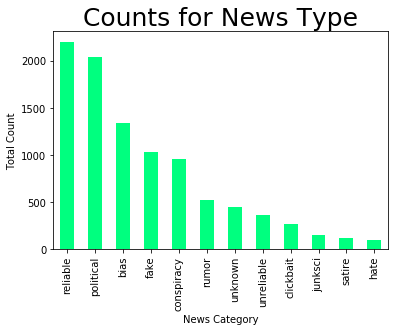

In [9]:
df.type.value_counts().plot(kind='bar', color='springgreen')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.title("Counts for News Type", fontsize=25)
plt.savefig('newstypecounts.png', bbox_inches='tight')


In [10]:
len(df.domain.unique())

403

In [11]:
df.domain.value_counts()['nytimes.com']

1777

There are 403 different news sources in the data.  To simplify things, create a new column with a category of 'other' for news sources that appear less than 50 times in the dataset.

In [12]:
def domain_edit(row):
    source = row['domain']
    if df.domain.value_counts()[source] < 40:
        return "other"
    else:
        return source
    
df['domain_edited'] = df.apply(domain_edit, axis=1)
     

In [32]:
df.domain_edited.value_counts()

other                        2627
nytimes.com                  1777
beforeitsnews.com             897
dailykos.com                  798
express.co.uk                 518
nationalreview.com            394
sputniknews.com               390
abovetopsecret.com            279
wikileaks.org                 244
www.newsmax.com               138
wikispooks.com                117
www.ammoland.com              105
investmentwatchblog.com       105
pravda.ru                      95
lifezette.com                  88
naturalnews.com                82
dailycaller.com                82
breitbart.com                  81
rawstory.com                   71
thepostemail.com               68
lifenews.com                   63
pjmedia.com                    62
thesleuthjournal.com           61
thedailysheeple.com            61
truthbroadcastnetwork.com      59
www.amazon.com                 56
liberalamerica.org             55
us.blastingnews.com            54
thinkprogress.org              54
twitchy.com   

Text(0.5, 1.0, 'Counts for Domain')

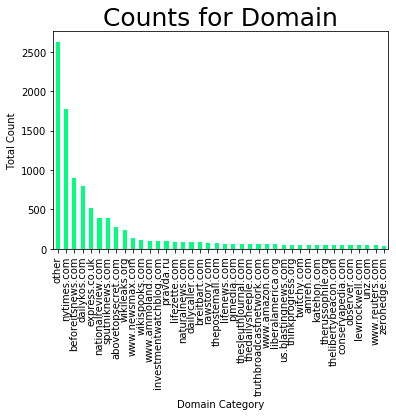

In [34]:
df.domain_edited.value_counts().plot(kind='bar', color='springgreen')
plt.xlabel('Domain Category')
plt.ylabel('Total Count')
plt.title("Counts for Domain", fontsize=25)

Top ten

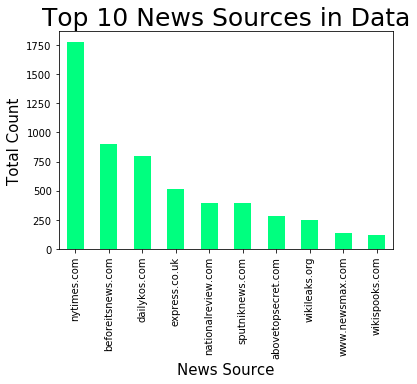

In [13]:
valcounts_domain = df.domain.value_counts()
topten_domain = valcounts_domain.head(10)
topten_domain.plot(kind='bar', color='springgreen')
plt.xlabel('News Source', fontsize=15)
plt.ylabel('Total Count', fontsize=15)
plt.title("Top 10 News Sources in Data", fontsize=25)
plt.savefig('top10newssources.png', bbox_inches='tight')



In [15]:
nytimes = df.loc[df['domain'] =='nytimes.com'] 


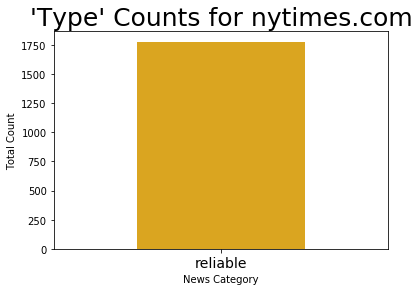

In [16]:
nytimes.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for nytimes.com", fontsize=25)
plt.savefig('nytimes.png', bbox_inches='tight')


This dataset labels all news from nytimes as inherently reliable.  Does this suggest an amount of bias inherent to the dataset?

In [18]:
beforeitsnews = df.loc[df['domain'] =='beforeitsnews.com'] 

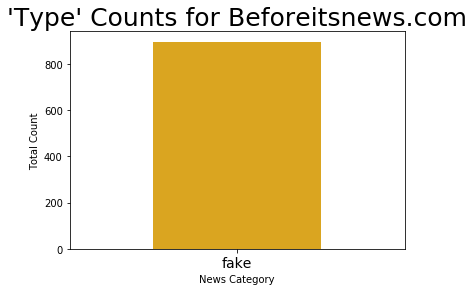

In [19]:
beforeitsnews.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for Beforeitsnews.com", fontsize=25)
plt.savefig('beforeitsnews.png', bbox_inches='tight')

In [20]:
beforeitsnews.shape

(897, 17)

Everything from Beforeitsnews.com is labelled as fake.

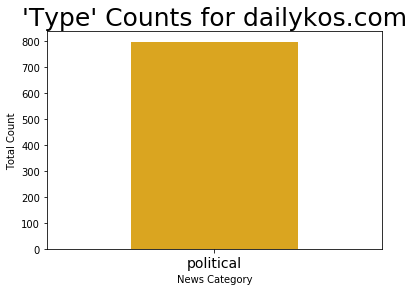

In [21]:
dailykos = df.loc[df['domain'] =='dailykos.com'] 
dailykos.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for dailykos.com", fontsize=25)
plt.savefig('dailykos.png', bbox_inches='tight')

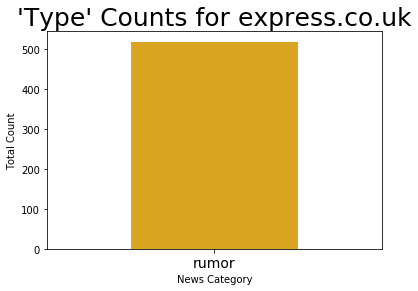

In [24]:
express = df.loc[df['domain'] =='express.co.uk'] 
express.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for express.co.uk", fontsize=25)
plt.savefig('express.co.uk.png', bbox_inches='tight')

In [25]:
pd.set_option('display.max_colwidth', 2000)
express.content.head()

document
4     ARSENAL 0 LIVERPOOL 2 []\n\nSamir Nasri impressed for the Gunners, despite being on the verge of a £22million move to Manchester City, but Arsenal's luck was out after Aaron Ramsey's own goal and a late strike from substitute Luis Suarez handed the visitors victory. Liverpool had the better chances, as Andy Carroll's first-half header was well saved by Wojciech Szczesny. Szczesny stood up to block Suarez's close-range effort before Thomas Vermaelen sprinted forwards from defence and blasted a 25-yard shot goalwards, but was off target. Liverpool snatched a fortunate lead on 78 minutes when Suarez darted into the six-yard box, with Miquel's clearance cannoning off Ramsey's chest and back over the goalkeeper into the net.\n\nWalcott was replaced by Nicklas Bendtner, another player who had appeared to be on his way out of Arsenal. A miserable afternoon for the Gunners was compounded when Suarez tapped in from close range following a quick counter-attack. The visitors were i

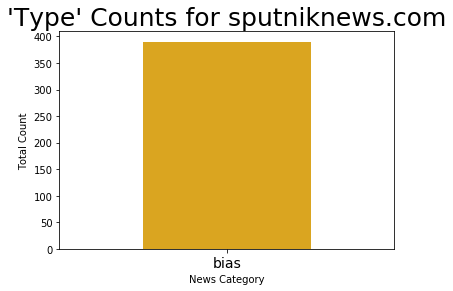

In [26]:
sputnik = df.loc[df['domain'] =='sputniknews.com'] 
sputnik.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for sputniknews.com", fontsize=25)
plt.savefig('sputnik.png', bbox_inches='tight')

In [27]:
sputnik.content.head()

document
56                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

This exploratory analysis has indicated some inherent biases in the data. Entire sources are labelled as 

Perhaps it may be difficult to include some of the "sub fake" categories in the dataset.  Let's consider, for a moment, just the articles labeled "fake".

In [80]:
allfake = df.loc[df['type'] =='fake'] 



In [82]:
allfake.domain.value_counts()

beforeitsnews.com            897
threepercenternation.com      32
thenet24h.com                 21
thefreepatriot.org            16
theinternetpost.net           12
coed.com                      10
newslo.com                     5
newswithviews.com              5
realnewsrightnow.com           4
therightscoop.com              3
70news.wordpress.com           3
weeklyworldnews.com            2
teaparty.org                   2
newsfrompolitics.com           2
rickwells.us                   2
clashdaily.com                 2
thetruthdivision.com           2
thecommonsenseshow.com         1
politicalsitenews.com          1
now8news.com                   1
thebigriddle.com               1
conservativedailypost.com      1
conservativefighters.com       1
dailyheadlines.com             1
vigilantcitizen.com            1
redrocktribune.com             1
usasupreme.com                 1
freedomdaily.com               1
Name: domain, dtype: int64

In [85]:
threepercenternation = allfake.loc[allfake['domain'] =='threepercenternation.com'] 
threepercenternation.content.head(10)


document
112                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [86]:
allreliable = df.loc[df['type'] =='reliable'] 



In [87]:
allreliable.domain.value_counts()

nytimes.com                  1777
www.reuters.com                43
www.yahoo.com                  32
christianpost.com              31
www.sfgate.com                 23
www.chron.com                  19
news.yahoo.com                 17
www.huffingtonpost.com         11
uk.finance.yahoo.com           10
uk.reuters.com                 10
indianexpress.com              10
www.washingtonpost.com          9
af.reuters.com                  9
consortiumnews.com              9
abcnews.go.com                  9
www.wsj.com                     8
www.msn.com                     8
www.businessinsider.com         7
www.nytimes.com                 6
www.nydailynews.com             6
www.npr.org                     6
ca.reuters.com                  6
music.yahoo.com                 6
www.legacy.com                  6
ca.news.yahoo.com               6
www.latimes.com                 5
sports.yahoo.com                5
m.mlb.com                       5
www.engadget.com                5
www.ndtv.com  

In [88]:
alljunksci = df.loc[df['type'] =='junksci'] 



In [89]:
alljunksci.domain.value_counts()

naturalnews.com              82
naturalnewsblogs.com         20
ancient-code.com             10
collectivelyconscious.net     9
realfarmacy.com               6
wakingtimes.com               4
naturalblaze.com              3
thetruthaboutcancer.com       2
collective-evolution.com      2
in5d.com                      1
icr.org                       1
ewao.com                      1
whydontyoutrythis.com         1
foodbabe.com                  1
revolutions2040.com           1
healthnutnews.com             1
Name: domain, dtype: int64

In [90]:
alljunksci.content.head()

document
62                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

This default labelling of everything from naturalnew.com as 'junksci' seems to be a flaw in the data, as, for example, the effects of Monsanto's Roudup Ready seeds are hotly debated outside of this article.